## Task 1: Bike Rental Forecasting – Project Overview

The goal of this project is to develop and evaluate regression models that predict the daily number of bike rentals based on weather, calendar, and seasonal data. The dataset comes from the Capital Bikeshare system in Washington, D.C., and is publicly available via the UCI repository.

In this notebook, we will:
1. Load and explore the dataset, identifying key variables and checking for missing values or duplicates.
2. Perform exploratory data analysis (EDA) to understand relationships between input features and the target variable (`cnt` – total count of rentals).
3. Prepare the data through encoding, scaling, and splitting into training and testing sets.
4. Build and evaluate multiple regression models (Linear Regression, Ridge, Lasso, Decision Trees, Random Forest, Gradient Boosting).
5. Assess model performance using metrics such as MAE, MSE, RMSE, and R².
6. Interpret feature importance and draw conclusions about the key factors influencing rental demand.
7. Summarize findings and reflect on possible improvements and future directions.

The final goal is to find the most accurate model and understand which features have the strongest impact on rental predictions.


## Import required libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Data Loading and Initial Exploration


>>> Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

>>> Descriptive statistics:
          instant      season          yr     

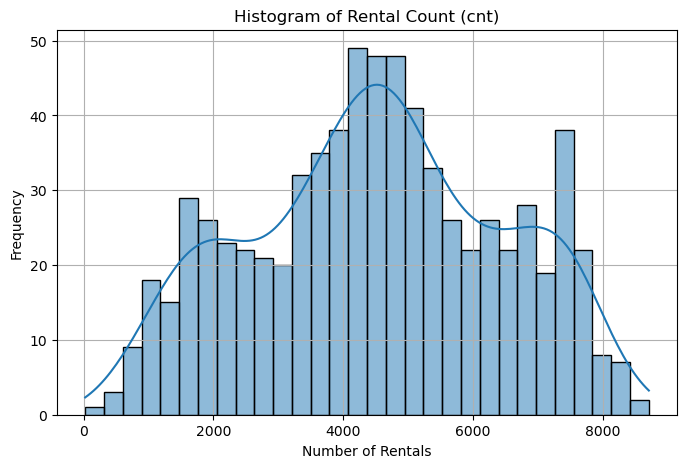


>>> Feature: temp
- Data type: float64
- Descriptive statistics:
count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64
- Unique values: [0.344167  0.363478  0.196364  0.2       0.226957  0.204348  0.196522
 0.165     0.138333  0.150833  0.169091  0.172727  0.16087   0.233333
 0.231667  0.175833  0.216667  0.292174  0.261667  0.1775    0.0591304
 0.0965217 0.0973913 0.223478  0.2175    0.195     0.203478  0.216522
 0.180833  0.192174  0.26      0.186957  0.211304  0.285833  0.271667
 0.220833  0.134783  0.144348  0.189091  0.2225    0.316522  0.415
 0.266087  0.318261  0.435833  0.521667  0.399167  0.285217  0.303333
 0.182222  0.221739  0.295652  0.364348  0.2825    0.343478  0.407273
 0.266667  0.335     0.198333  0.384167  0.376522  0.261739  0.2925
 0.295833  0.389091  0.329167  0.384348  0.325217  0.317391  0.365217
 0.54      0.4725    0.3325    0.4

In [6]:
# Load data into a DataFrame
df = pd.read_csv("day.csv")

# Check the structure of the data
print(">>> Dataset info:")
df.info()

# Basic descriptive statistics
print("\n>>> Descriptive statistics:")
print(df.describe())

# Check data types
print("\n>>> Data types:")
print(df.dtypes)

# Check for missing values
print("\n>>> Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("\n>>> Number of duplicated rows:")
print(df.duplicated().sum())

# Target variable: cnt
print("\n>>> Target variable 'cnt' statistics:")
print(f"Mean: {df['cnt'].mean():.2f}")
print(f"Median: {df['cnt'].median():.2f}")
print(f"Standard Deviation: {df['cnt'].std():.2f}")
print(f"Min: {df['cnt'].min()}, Max: {df['cnt'].max()}")

# Histogram of the 'cnt' variable
plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Histogram of Rental Count (cnt)")
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Input features to explore
features = ['temp', 'atemp', 'hum', 'windspeed', 'weekday', 'season', 'workingday', 'holiday']

# Descriptive stats and types for input features
for col in features:
    print(f"\n>>> Feature: {col}")
    print("- Data type:", df[col].dtypes)
    print("- Descriptive statistics:")
    print(df[col].describe())
    print("- Unique values:", df[col].unique())

